In [1]:
import os
import numpy as np

import PIL
import imageio
from PIL import Image
from IPython.display import display, clear_output

from l5kit_conflict.pickle.io import init_dataset
from l5kit_conflict.analysis.post_process import load_l5kit_potential_conflicts

D:\github\lyft_intersection\l5kit\l5kit\l5kit\dataset\select_agents.py:31: UserWarning: Windows detected. BLOSC_NOLOCK has not been set as it causes memory leaks on Windows.However, writing the mask with this config may be inconsistent.
  warnings.warn(


In [2]:
os.environ["L5KIT_DATA_FOLDER"] = "./" ## Set the environmental variable

dataset_name = "validate"
dataset = init_dataset(dataset_name)

In [3]:
AVHV_potential_conflict_dataset, HVHV_potential_conflict_dataset = load_l5kit_potential_conflicts()

1> Loading pickle files ...
HVHV dataset #samples: 739
AVHV dataset #samples: 678
2> Removing unnecessary conflicts ...
HVHV dataset #samples: 608
AVHV dataset #samples: 508
3> Removing AVHV conflicts with non-continuous AV trajectories ...
HVHV dataset #samples: 608
AVHV dataset #samples: 479
4> Post-processing the complex potential conflicts ...
HVHV dataset #samples: 459
AVHV dataset #samples: 400


In [19]:
for conflict in AVHV_potential_conflict_dataset:
    if conflict.scene_indices == (13894, 13895):
        print(conflict.first_id, conflict.PET)

7 7.4


In [16]:
counter = 0

for conflict in HVHV_potential_conflict_dataset:
    if conflict.PET > 7.5:
        print(conflict.PET, conflict.dataset, conflict.scene_indices, conflict.category, conflict.direction, conflict.first_id)
        counter += 1
counter

8.1 train2 (21194, 21195, 21196) cross straight&turnleftRight 20
8.7 train2 (37008, 37009, 37010) cross straight&turnleftRight 35
9.6 train2 (44988, 44989) cross straight&turnleftRight 3
8.9 train2 (55319, 55320) cross straight&turnleftRight 7
9.4 train2 (55976, 55977) cross straight&turnleftRight 8
9.5 train2 (101072, 101073) cross straight&turnleftRight 4
9.0 train2 (115697, 115698) cross straight&turnleftRight 6
7.7 train2 (117648, 117649) cross straight&turnleftRight 5
8.8 train2 (129162, 129163) cross straight&turnleftRight 3
7.8 train2 (129479, 129480) cross straight&turnleftRight 3
8.0 train2 (129775, 129776) cross straight&turnleftBottom 1
9.5 train2 (130816, 130817) cross straight&turnleftRight 12
9.6 train2 (4781, 4782) merge turnleft&turnright 5
7.7 train2 (7233, 7234) merge turnleft&turnright 18
9.2 train2 (7250, 7251) merge turnleft&turnright 7
9.7 train2 (16825, 16826, 16827) merge turnleft&turnright 14
8.1 train2 (28720, 28721, 28722) merge turnleft&turnright 10
9.9 trai

81

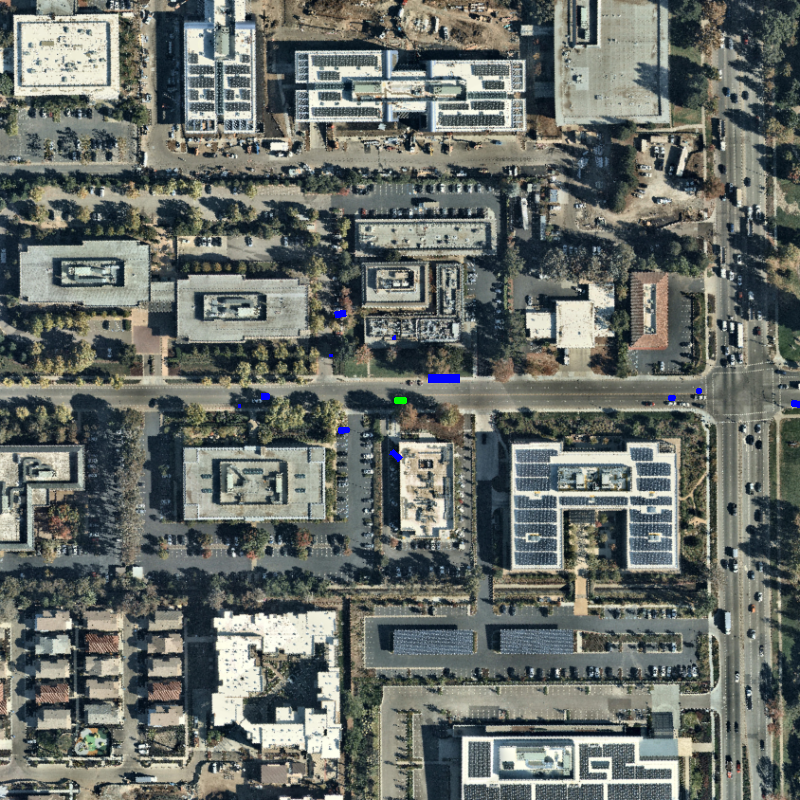

In [25]:
# for category in AVHV_conflicts.keys():
#     for direction in AVHV_conflicts[category].keys():
#         for index, conflict in enumerate(AVHV_conflicts[category][direction]):
#             # retrieve the conflict
#             c = list(conflict.values())[0]
#             if c.delta_time / 10 > 7.5:
#                 print(list(conflict.keys())[0], c.delta_time)

dataset_name = "validate"
dataset = init_dataset(dataset_name)

scene_idx = (13894, 13895)
indexes = []
for idx in scene_idx:
    indexes = indexes + list(dataset.get_scene_indices(idx))

images = []
for i, idx in enumerate(indexes):
    if i % 3 == 0:
        data = dataset[idx]
        im = data["image"].transpose(1, 2, 0)
        im = dataset.rasterizer.to_rgb(im)
        # target_positions_pixels = transform_points(data["target_positions"], data["raster_from_agent"])
        # center_in_pixels = np.asarray(cfg["raster_params"]["ego_center"]) * cfg["raster_params"]["raster_size"]
        # draw_trajectory(im, target_positions_pixels, TARGET_POINTS_COLOR, yaws=data["target_yaws"])
        clear_output(wait=True)
        display(Image.fromarray(im))
    
        pil_image = Image.fromarray(im)
        images.append(pil_image)

imageio.mimsave(f"./scene_gif/{dataset_name}_{scene_idx}.gif", images, duration=100)
clear_output(wait=True)